# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import subfunc as sf

In [2]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_X_TRAIN_DATA = 'data/x_train.csv'
POST_PROCESSING_X_TEST_DATA = 'data/x_test.csv'
POST_PROCESSING_Y_TRAIN_DATA = 'data/y_train.csv'
POST_PROCESSING_Y_TEST_DATA = 'data/y_test.csv'
SOURCE_DATA = 'source/'
pd.options.display.max_columns = 90
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

Информация о данных

In [3]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index', decimal=',')
data.describe(include='all')

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444.000000,6440.000000,6440.000000,6444.000000,5249.000000,6435.000000,5883.000000,6431.000000,6431.000000,6178.000000,6436.000000,6436.000000,6426.000000,1389.000000,6440.000000,6444.000000,6444.000000,6444.0,6444.0,6426.000000,1389.000000,724.000000,4770.000000,13.00,6422.000000,7.000000,6307.000000,5910.000000,6244.000000,33.000000,5.000000,383.000000,6179.000000,6400.000000,82.000000,6398.000000,1017.000000,5883.000000,6440.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6443.000000,6443.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6218.000000,6444.000000,6444.000000,6444.000000,6444.000000,6442.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000
unique,7041,7041,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,г683863?8<?,2071-01-26 12:04:00,Э76ХФ,Р65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4953,6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,26.492241,46.194099,21.010523,46.063051,3.004414,0.403088,0.117692,0.139068,0.130561,0.051366,1567.771753,1587.973897,11.593261,13.227743,12989.038791,114.404252,1.009001,1.0,1.0,15.450528,10.547284,0.020862,0.132179,0.02,0.066706,0.385714,0.420162,0.054730,0.020086,0.019429,0.044000,0.023845,0.061368,0.143436,0.039869,0.215540,0.026624,0.208039,4557.236180,0.001782,0.466162,0.273289,0.101999,0.672277,0.007049,0.009971,0.07099

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

Нахождение самой популярной марки

In [5]:
top_mark = data.describe(include='all').loc["top", "МАРКА"]
print("Самая популярная марка - ", top_mark)

Самая популярная марка -  Э76ХФ


Процент пропущенных значений в датасете

In [6]:
zero_parts = data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])
zero_parts

ферспл FeSi-75                0.999290
сыпуч  кокс. мелочь (сух.)    0.999006
сыпуч кварцит                 0.998154
ферспл FeMo                   0.995313
ферспл  Ni H1 пласт.          0.988354
                                ...   
химсталь последний C          0.084789
ПРОФИЛЬ                       0.000000
МАРКА                         0.000000
DT                            0.000000
nplv                          0.000000
Length: 84, dtype: float64

Заполняем пропущенную треть нулями

In [7]:
zero_filling = zero_parts[(zero_parts > 0.3) & (zero_parts < 0.35)]
zero_filling.index.to_list()

['химшлак последний SiO2',
 'химшлак последний Al2O3',
 'химшлак первый SiO2_1',
 'химшлак первый Al2O3_1',
 'сыпуч известь РП']

In [8]:
data[zero_filling.index.to_list()] = data[zero_filling.index.to_list()].fillna(0)

Перевод даты во время изготовления сплава

In [9]:
data['DT'] = sf.date_to_interval(data['DT'])

Работаем только с самой популярной маркой

In [10]:
data = data[data['МАРКА'] == top_mark]
data.shape

(4953, 84)

Оставляем колонки с > 65% известных данных

In [11]:
dropped_data = sf.drop_columns(data, 0.65)

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл FeMo, ферспл FeSi-75, ферспл FeV азот., ферспл  Ni H1 пласт., ферспл  ферванит


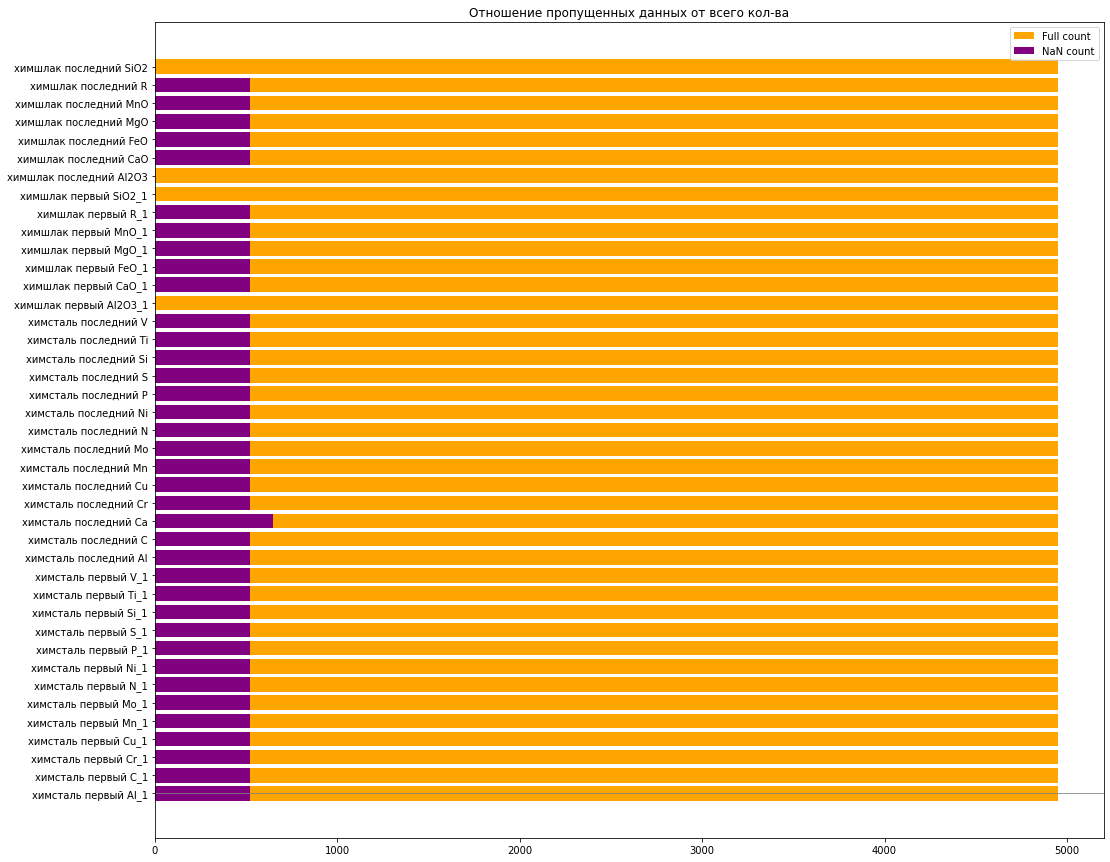

In [12]:
import re

from matplotlib import pyplot as plt

df_him = data[[column for column in data.columns if re.search('хим',
                                                                  column.lower())]]
df_nan_count = df_him.isnull().sum(axis=0)
df_full_count = df_him.notnull().sum() + df_nan_count

ind = np.arange(len(df_him.columns))

fig, ax = plt.subplots(figsize=(17, 15))


ax.barh(ind, df_full_count, label='Full count', color='orange')
ax.barh(ind, df_nan_count, label='NaN count', color='purple')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_title('Отношение пропущенных данных от всего кол-ва')
ax.set_yticks(ind)
ax.set_yticklabels(df_him.columns)
ax.legend()

plt.savefig(f'{SOURCE_DATA}nan.png')

del df_him
del df_nan_count
del df_full_count


In [13]:
chemical_columns = []
for column in data.columns:
    if 'хим' in column and column not in target_columns:
        chemical_columns.append(column)

Удаляем объекты в которых пропущено больше 35% признаков

In [14]:
dropped_data = sf.drop_rows(dropped_data, 0.35)

 * Заполняем пропущенные данные, группируя по комбинациям признаков
  * Профиль
  * Марка

In [15]:
str_columns = ['ПРОФИЛЬ', 'МАРКА', 'nplv']
all_columns = dropped_data.columns.to_list()
result_columns = list(set(all_columns) - set(str_columns))

dropped_data = sf.mean_filling(dropped_data, result_columns, ['МАРКА','ПРОФИЛЬ'])
#dropped_data = dropped_data.fillna(0)

Предположительно свойство 'nplv' является зашифровоной индексацией и на модель не влияет

In [16]:
dropped_data = dropped_data.drop(columns=['nplv', 'МАРКА', 'ПРОФИЛЬ'])

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


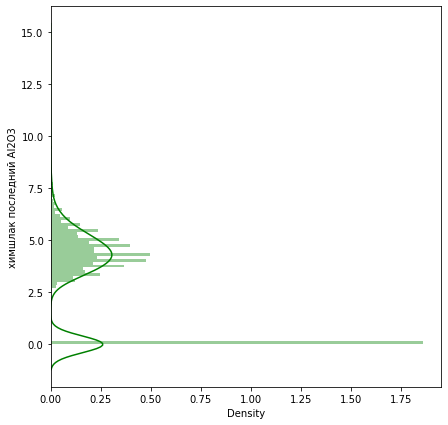

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


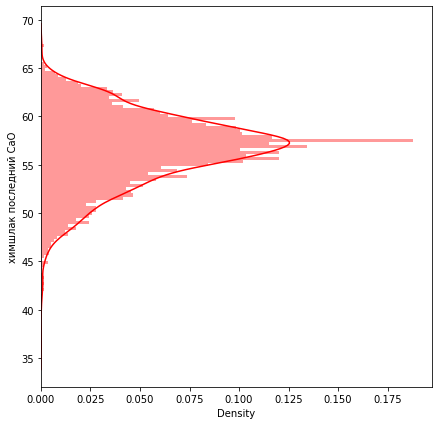

In [18]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


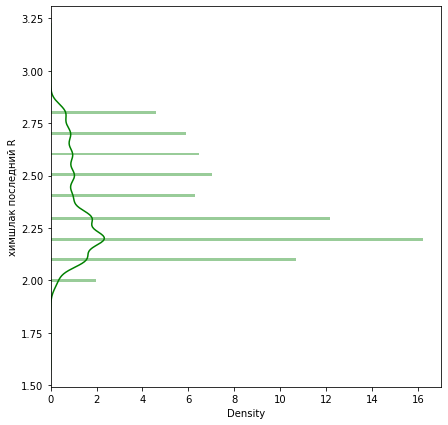

In [19]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


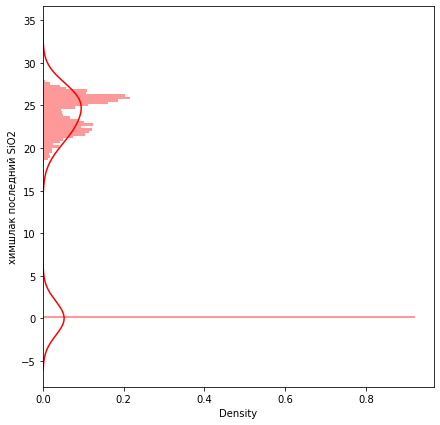

In [20]:
plt.figure(figsize=(7, 7))
sns.distplot(dropped_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

In [21]:
normalized_data = sf.normalize_data(dropped_data)
del dropped_data

In [22]:
corr_data = normalized_data.drop(columns=target_columns).corr()

#plt.figure(figsize=(52, 50))

#sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
 #          cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 #          annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map.png')

In [23]:
useless_list = []
for ind in corr_data.index:
    for col in corr_data.columns:
        if ind != col and abs(corr_data.loc[ind, col] >= 0.8 ):
            if [col, ind, corr_data.loc[ind, col]] not in useless_list:
                useless_list.append([ind, col, corr_data.loc[ind, col]])

useless_list
del corr_data

В списке "useless_list" помимо дйствительно коррелирующих признаков есть признаки, которые мы отметили, как ложно-коррелирующие
Список коррелирующих:
 * 'химсталь первый Cr_1', 'химсталь последний Cr'
 * 'химсталь первый Cu_1', 'химсталь последний Cu'
 * 'химсталь первый Mo_1', 'химсталь последний Mo'
 * 'химсталь первый Ni_1', 'химсталь последний Ni'
 * 'химсталь первый P_1', 'химсталь последний P'
 * 'химсталь первый Si_1', 'химсталь последний Si'
 * 't обработка', 't продувка'
 * 't под током', 'эл. энергия'

Из карты корреляции видно, что свойства объектов 'произв количество плавок ' и 'произв количество плавок (цел)'
не коррелирует даже сами с собой, рассмотрим их более внимательно


In [24]:
normalized_data[['произв  количество плавок','произв количество плавок (цел)']].describe()

,произв количество плавок,произв количество плавок (цел)
count,4432.0,4432.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


Из описания следует, что эти два признака имеют только по одному уникальному значению,
тк среднее кв. отклонение равно нулю, избавимся от них.

In [25]:
correlation_list = [ 'химсталь первый Cr_1',
                     'химсталь первый Cu_1',
                     'химсталь первый Mo_1',
                     'химсталь первый Ni_1',
                     'химсталь первый P_1',
                     'химсталь первый Si_1',
                     't обработка',
                     't под током',
                     'произв  количество плавок',
                     'произв количество плавок (цел)' ]

normalized_data = normalized_data.drop(columns=correlation_list)

Избавление от аномалий

In [26]:
normalized_data = sf.remove_noises(normalized_data)

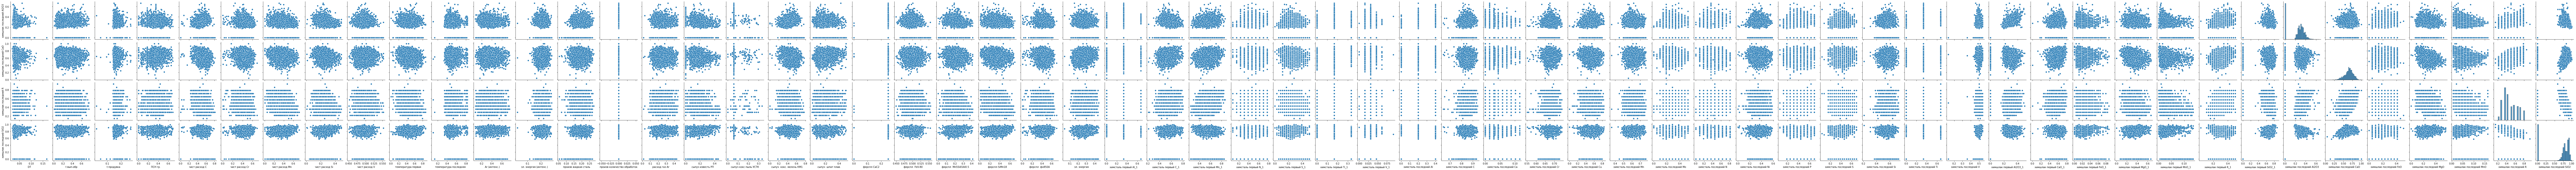

In [27]:
plot_data = normalized_data
sns_plot = sns.pairplot(plot_data,
                    x_vars=plot_data.columns,
                    y_vars=target_columns)
sns_plot.savefig('source/multi_map1.png')


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_data.drop(columns=target_columns),
                                                    normalized_data[target_columns],
                                                    test_size=0.3, random_state=42)

In [29]:
X_train.to_csv(POST_PROCESSING_X_TRAIN_DATA, sep='\t')
X_test.to_csv(POST_PROCESSING_X_TEST_DATA, sep='\t')

y_train.to_csv(POST_PROCESSING_Y_TRAIN_DATA, sep='\t')
y_test.to_csv(POST_PROCESSING_Y_TEST_DATA, sep='\t')